In [1]:
import pandas as pd

In [4]:
df=pd.read_excel("C:/Users/liash/OneDrive/Desktop/Lia Resume/synthetic_content_views.xlsx")
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      244 non-null    datetime64[ns]
 1   Category  244 non-null    object        
 2   Views     244 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 5.8+ KB


,Date,Views
count,244,244.000000
mean,2022-07-01 20:51:08.852459008,21051.905738
min,2020-01-01 00:00:00,9045.000000
25%,2021-04-01 00:00:00,16698.500000
50%,2022-07-01 00:00:00,21922.500000
75%,2023-10-01 00:00:00,25605.000000
max,2025-01-01 00:00:00,29760.000000
std,NaN,5235.441347


In [11]:
df= df.sort_values(['Category', 'Date'])
#time series depends on proper cronological order

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
sns.set_theme(style="whitegrid")

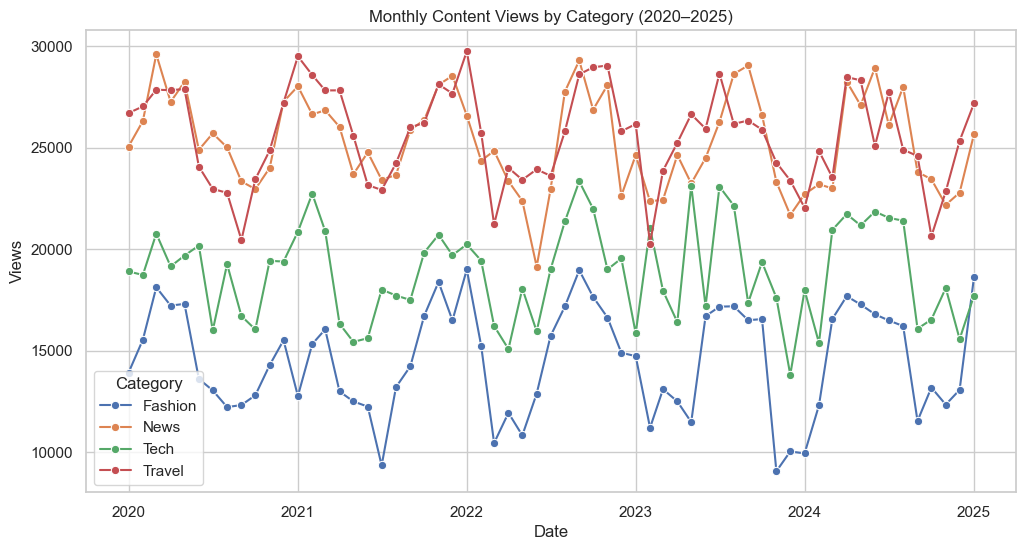

In [16]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Views', hue='Category', marker='o')
plt.title("Monthly Content Views by Category (2020–2025)")
plt.xlabel("Date")
plt.ylabel("Views")
plt.legend(title="Category")
plt.show()

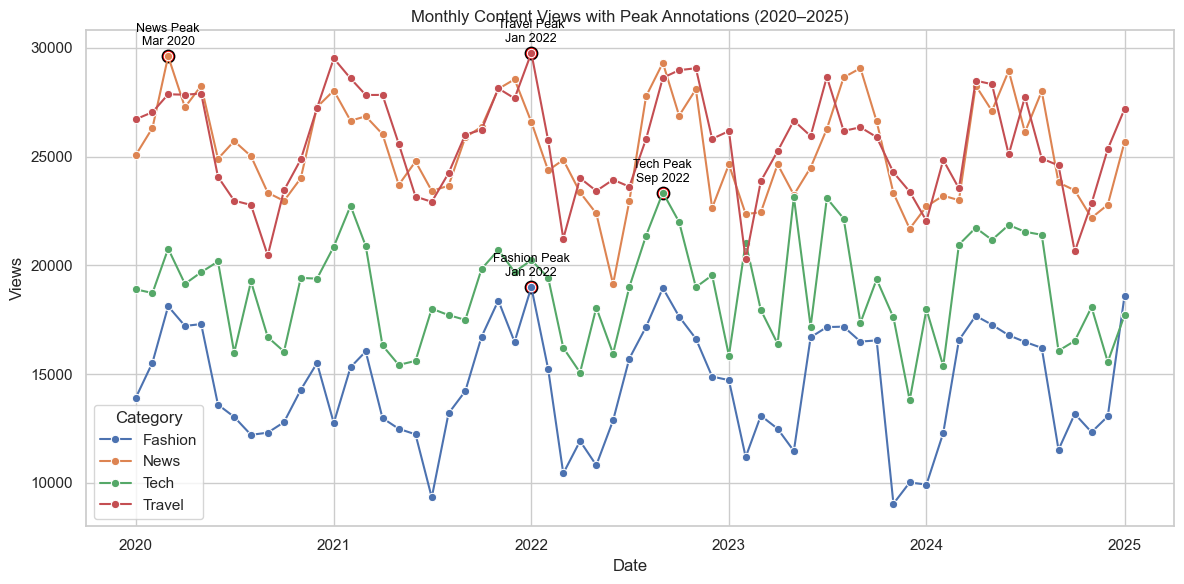

In [20]:
#annotations

peak_points = df.loc[df.groupby('Category')['Views'].idxmax()]

plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='Date', y='Views', hue='Category', marker='o')

for _, row in peak_points.iterrows():
    plt.text(
        row['Date'], row['Views'] + 500,                # Position slightly above the peak
        f"{row['Category']} Peak\n{row['Date'].strftime('%b %Y')}",  # Label text
        color='black', fontsize=9, ha='center'
    )
    plt.scatter(row['Date'], row['Views'], color='red', s=80, edgecolor='black')

plt.title("Monthly Content Views with Peak Annotations (2020–2025)")
plt.xlabel("Date")
plt.ylabel("Views")
plt.legend(title="Category")
plt.tight_layout()
plt.show()

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
#seperates time series into trend, seasonal, and residual component

In [23]:
travel_df = df[df['Category'] == 'Travel'].copy()
travel_df = travel_df.set_index('Date')

In [24]:
decomposition = seasonal_decompose(travel_df['Views'], model='additive', period=12)

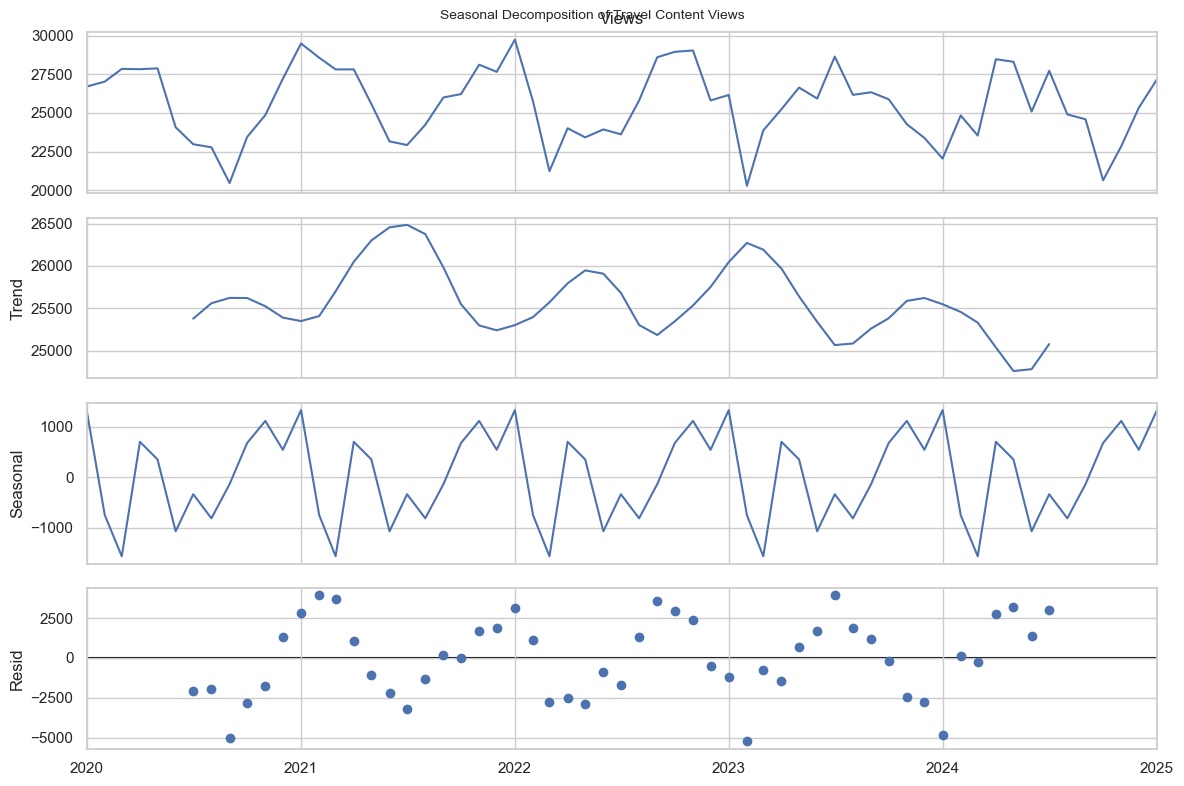

In [26]:
plt.rcParams.update({'figure.figsize': (12, 8)})
decomposition.plot()
plt.suptitle('Seasonal Decomposition of Travel Content Views', fontsize=10)
plt.show()

In [28]:
# Shows clear yearly seasonality and a mild upward trend in Travel content views, with peaks during specific months and low random noise.
# Decomposition shows a clear repeating seasonal pattern and mild trend, but looks uniform since data was generated using a sine function (synthetic). Real data would show more irregular seasonal variations and noise.

In [29]:
#Automated for all categories 

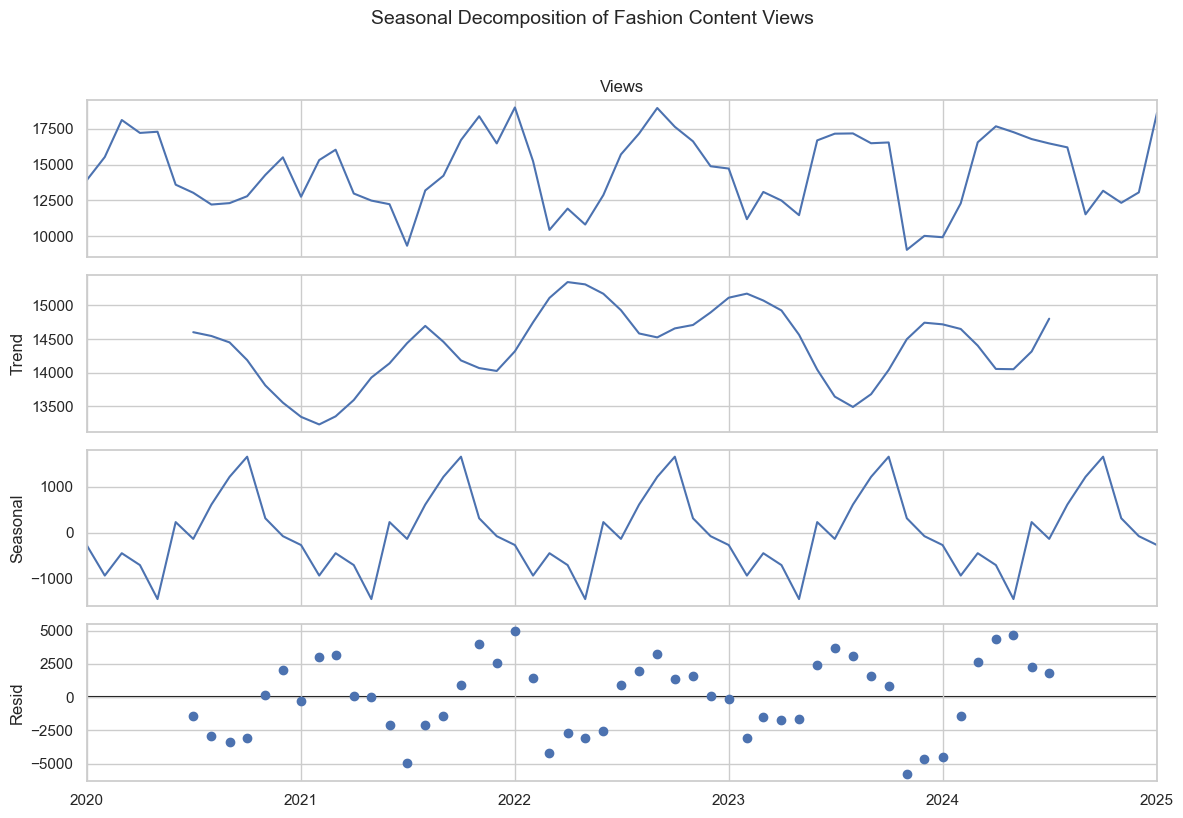

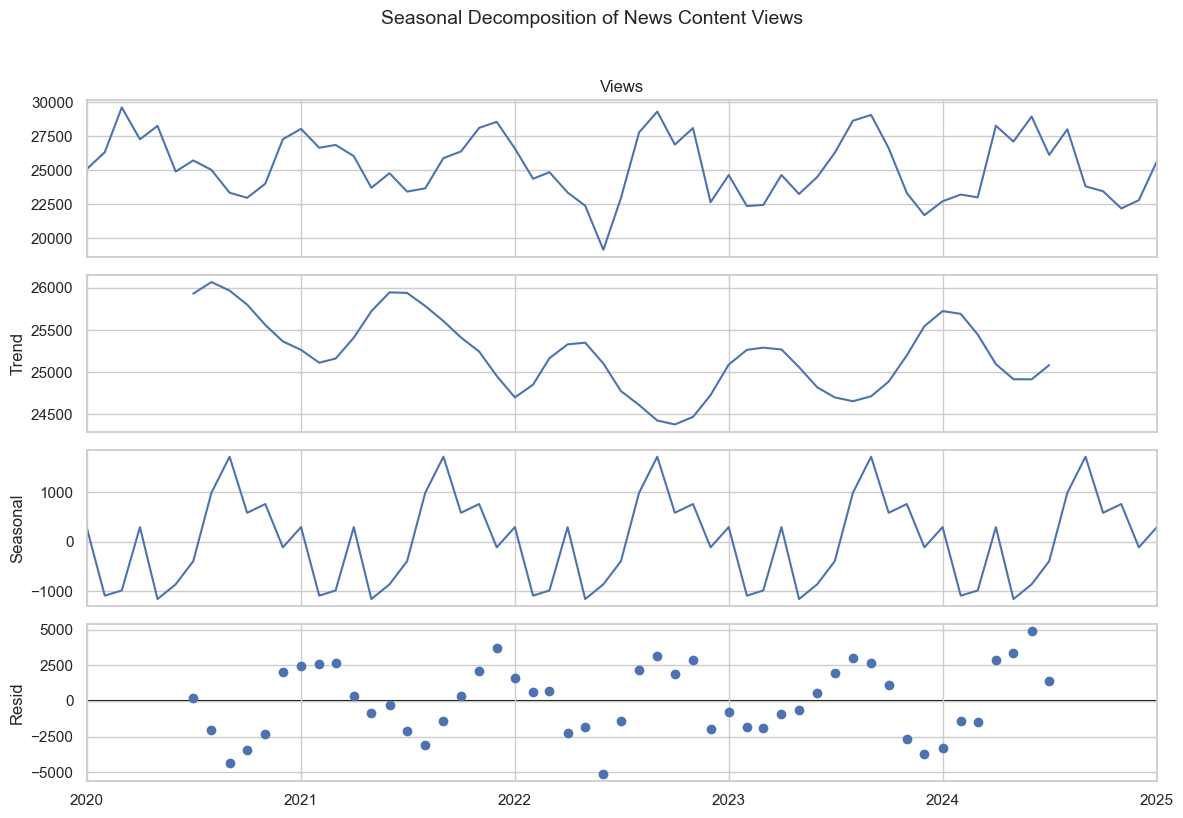

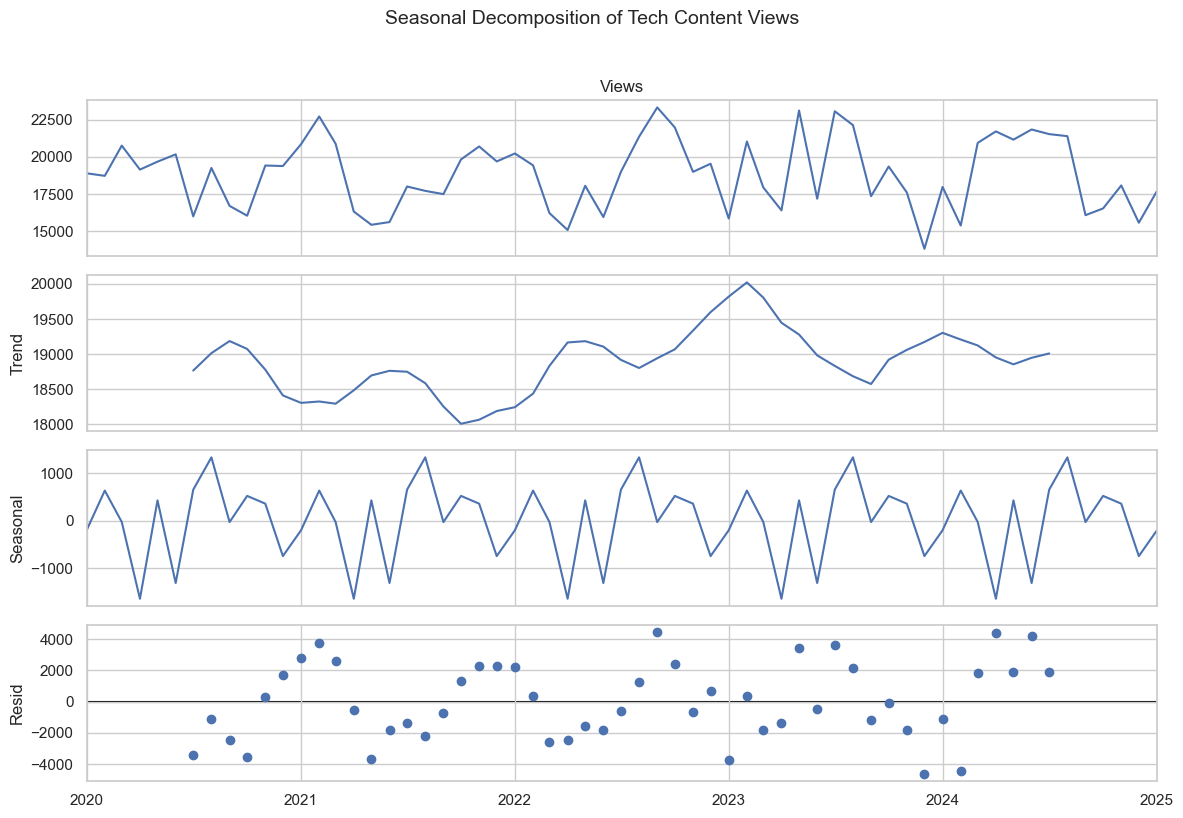

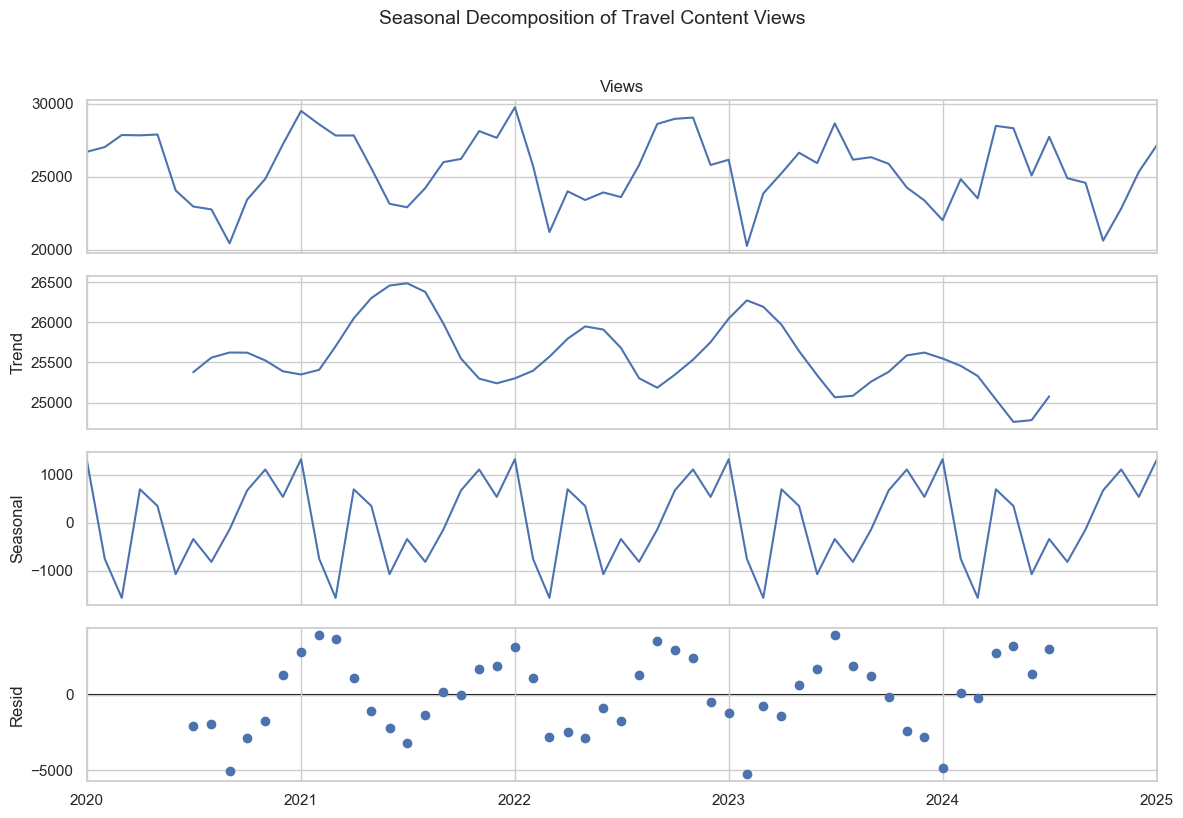

In [30]:
categories = df['Category'].unique()

for cat in categories:
    
    cat_df = df[df['Category'] == cat].copy()
    cat_df = cat_df.set_index('Date')

    
    decomposition = seasonal_decompose(cat_df['Views'], model='additive', period=12)

    plt.rcParams.update({'figure.figsize': (12, 8)})
    fig = decomposition.plot()
    fig.suptitle(f'Seasonal Decomposition of {cat} Content Views', fontsize=14, y=1.02)
    plt.tight_layout()
    plt.show()

In [ ]:
# In fashion, we can see a rise in tread during autumn and spring, along with higher interst in news during the beginning of the year and towrds the end
#There is an increase in views for tech around September, mostly with the realise of new technologies from brands like Apple

In [32]:
#Forecasting 
from statsmodels.tsa.arima.model import ARIMA

travel_df = df[df['Category'] == 'Travel'].copy()
travel_df = travel_df.set_index('Date')

model = ARIMA(travel_df['Views'], order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())

C:\Users\liash\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\liash\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\liash\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\liash\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\liash\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA param

                               SARIMAX Results                                
Dep. Variable:                  Views   No. Observations:                   61
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -547.449
Date:                Thu, 06 Nov 2025   AIC                           1100.899
Time:                        23:10:07   BIC                           1107.182
Sample:                    01-01-2020   HQIC                          1103.356
                         - 01-01-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6116      1.091     -0.560      0.575      -2.750       1.527
ma.L1          0.5636      1.138      0.495      0.620      -1.666       2.793
sigma2       5.11e+06   1.06e+06      4.799      0.0

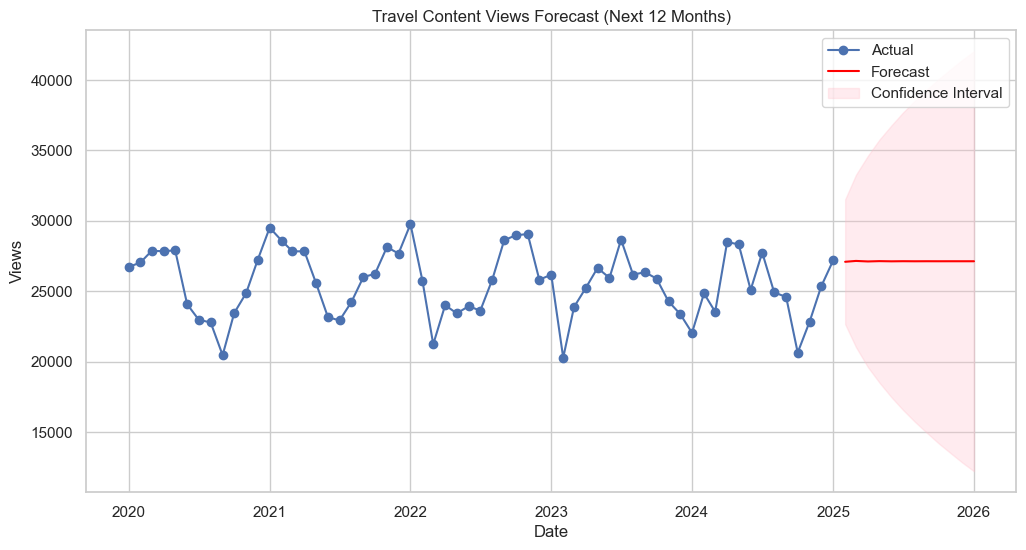

In [33]:
forecast_steps = 12
forecast = model_fit.get_forecast(steps=forecast_steps)

forecast_df = forecast.summary_frame()

plt.figure(figsize=(12,6))
plt.plot(travel_df.index, travel_df['Views'], label='Actual', marker='o')
plt.plot(forecast_df.index, forecast_df['mean'], label='Forecast', color='red')
plt.fill_between(forecast_df.index, forecast_df['mean_ci_lower'], forecast_df['mean_ci_upper'], 
                 color='pink', alpha=0.3, label='Confidence Interval')
plt.title('Travel Content Views Forecast (Next 12 Months)')
plt.xlabel('Date')
plt.ylabel('Views')
plt.legend()
plt.show()

C:\Users\liash\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\liash\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


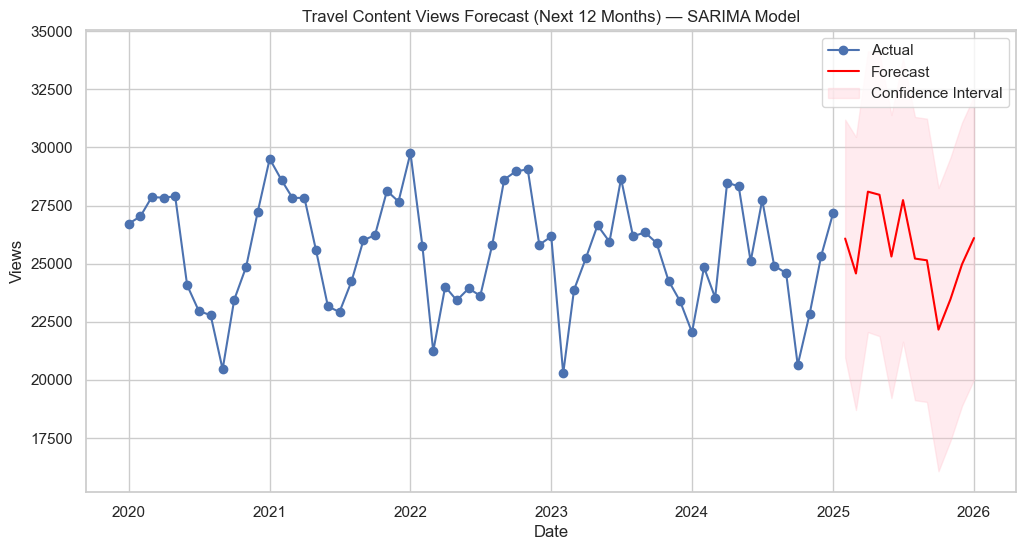

In [36]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Filter for Travel category
travel_df = df[df['Category'] == 'Travel'].copy()
travel_df = travel_df.set_index('Date')

# Fit SARIMA model (p,d,q)(P,D,Q,seasonal_periods)
model = SARIMAX(
    travel_df['Views'],
    order=(1, 0, 1),               # non-seasonal ARIMA part
    seasonal_order=(1, 1, 1, 12),  # seasonal part (12 = yearly cycle)
    enforce_stationarity=False,
    enforce_invertibility=False
)
model_fit = model.fit(disp=False)

# Forecast next 12 months
forecast_steps = 12
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_df = forecast.summary_frame()

# Plot actual vs forecast
plt.figure(figsize=(12,6))
plt.plot(travel_df.index, travel_df['Views'], label='Actual', marker='o')
plt.plot(forecast_df.index, forecast_df['mean'], label='Forecast', color='red')
plt.fill_between(
    forecast_df.index,
    forecast_df['mean_ci_lower'],
    forecast_df['mean_ci_upper'],
    color='pink', alpha=0.3, label='Confidence Interval'
)
plt.title('Travel Content Views Forecast (Next 12 Months) — SARIMA Model')
plt.xlabel('Date')
plt.ylabel('Views')
plt.legend()
plt.show()

In [38]:
# The blue line represents the actual historical content views for the 'Travel' category.
# The red line represents the model’s forecast for the next 12 months (future predictions).
# The pink shaded region shows the confidence interval — the possible range where future values are likely to fall.

#Interpretations 
# 1. The SARIMA model captures the repeating yearly pattern (seasonality) seen in the past data.
# 2. The forecast shows moderate fluctuations in the upcoming year, consistent with the seasonal behaviour seen before.
# 3. The confidence interval widens over time, indicating increasing uncertainty further into the future 
# 4. Overall, the forecast suggests that 'Travel' content views will remain within a similar range as previous years, with expected rises and falls around specific seasonal peaks


C:\Users\liash\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\liash\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


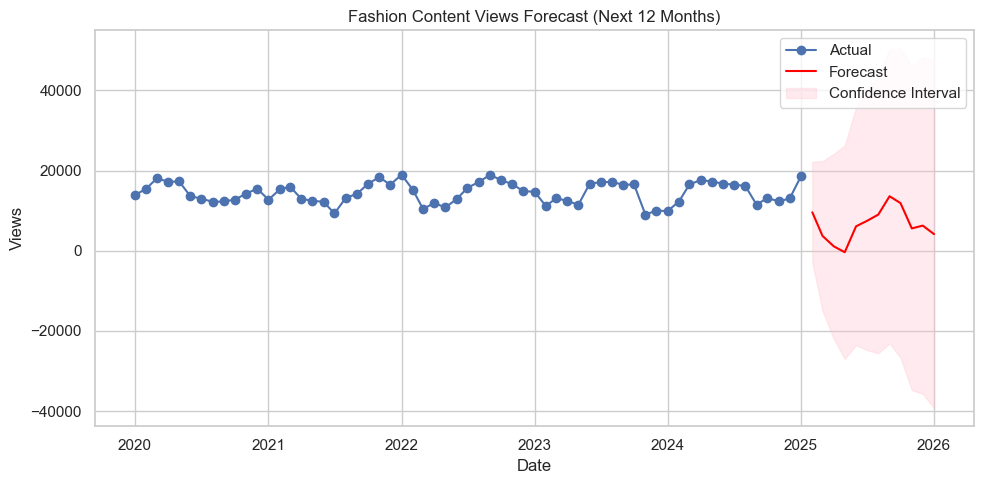

C:\Users\liash\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\liash\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


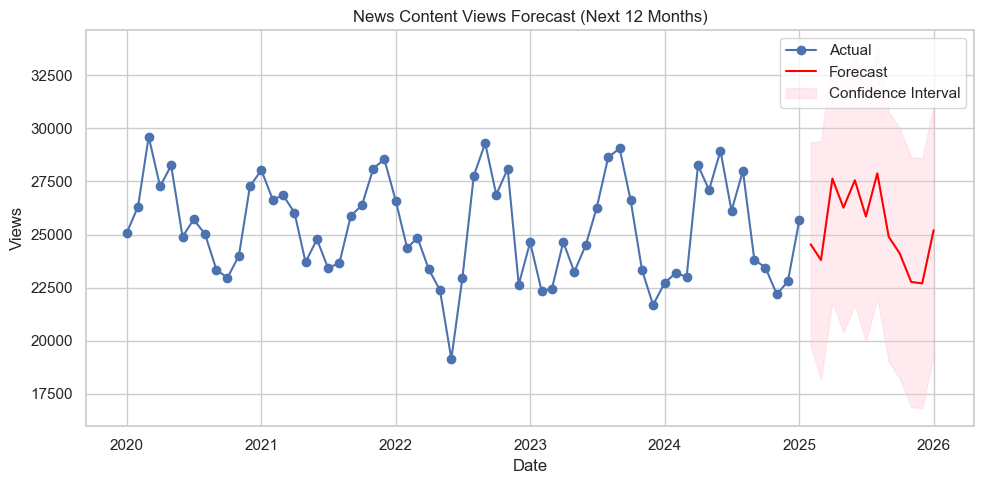

C:\Users\liash\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\liash\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


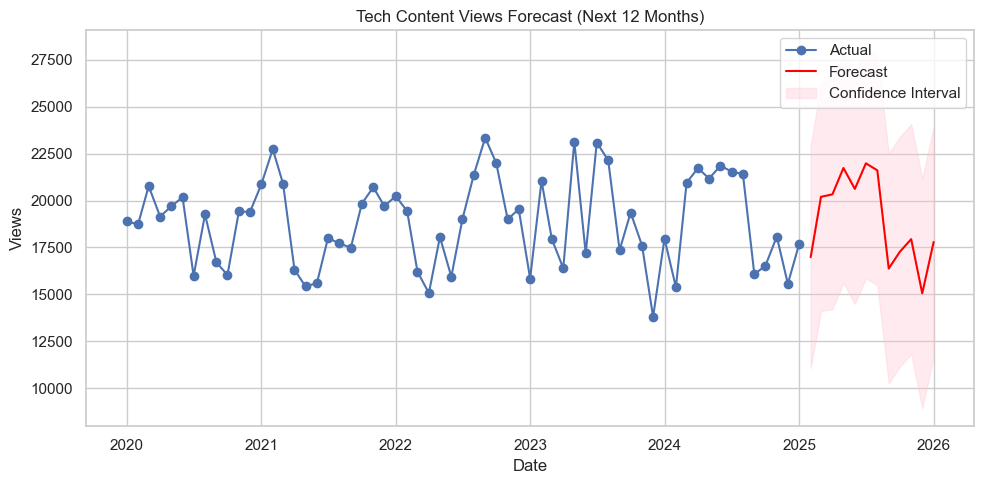

C:\Users\liash\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\liash\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


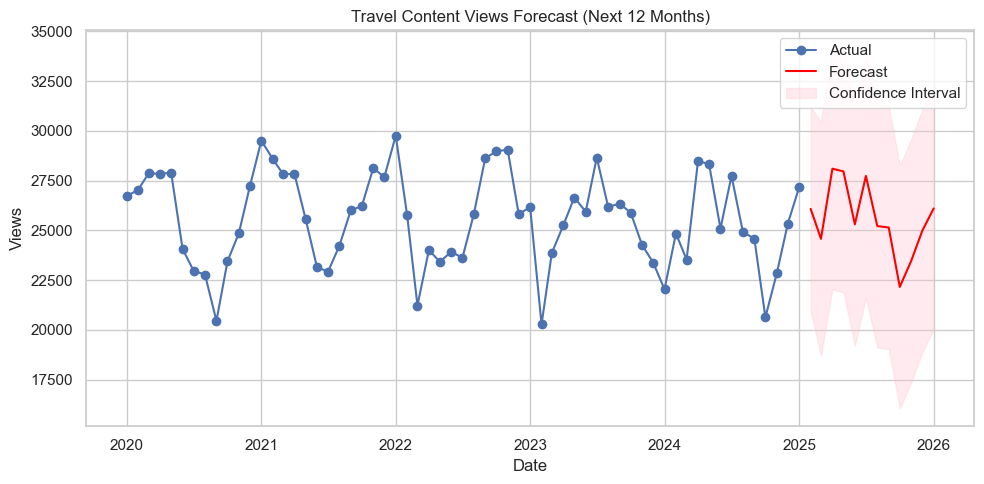

In [40]:
forecasts = {}

for cat in categories:
    # Filter data for this category
    cat_df = df[df['Category'] == cat].copy()
    cat_df = cat_df.set_index('Date')
    
    # Extract the series
    y = cat_df['Views']
    
    # Fit a SARIMA model (using simple parameters)
    model = SARIMAX(y, order=(1,0,1), seasonal_order=(1,1,1,12),
                    enforce_stationarity=False, enforce_invertibility=False)
    results = model.fit(disp=False)
    
    # Forecast for the next 12 months
    forecast = results.get_forecast(steps=12)
    forecast_df = forecast.summary_frame()
    
    # Store it
    forecasts[cat] = forecast_df
    
    # Plot actual + forecast
    plt.figure(figsize=(10, 5))
    plt.plot(y.index, y, label='Actual', marker='o')
    plt.plot(forecast_df.index, forecast_df['mean'], label='Forecast', color='red')
    plt.fill_between(forecast_df.index, 
                     forecast_df['mean_ci_lower'], 
                     forecast_df['mean_ci_upper'], 
                     color='pink', alpha=0.3, label='Confidence Interval')
    
    plt.title(f'{cat} Content Views Forecast (Next 12 Months)')
    plt.xlabel('Date')
    plt.ylabel('Views')
    plt.legend()
    plt.tight_layout()
    plt.show()